# BANK CHURNERS

In [1]:
#Import needed Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import csv
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score,precision_score,precision_recall_curve,confusion_matrix,recall_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier


In [2]:
#File Contains Non-informative columns
data=pd.read_csv('/kaggle/input/credit-card-customers/BankChurners.csv',na_values='NULL')
data=data[data.columns[:-2]]
data.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
np.random.seed=42;seed=42

Target Column is Attrition_Flag Column 

In [4]:
data.shape

(10127, 21)

In [5]:
data.Attrition_Flag.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

The data is imbalanced as can be seen above from its Target value counts
with 1627 Attrited Customers out of 10127 customers


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

data have no missing point

In [7]:
#Analysing Customers Age
age=data.Customer_Age.astype("int64")
age.describe()

count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64

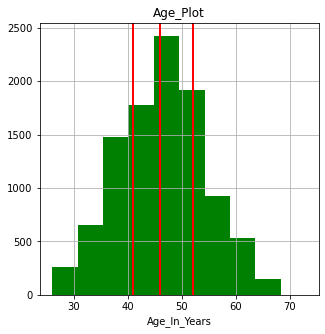

In [8]:
fig=plt.figure(figsize=(5,5))
plt.title('Age_Plot')
plt.hist(age,color='g')
plt.grid(True)
plt.xlabel('Age_In_Years')
for x in [0.25,0.50,0.75]:
    plt.axvline(age.quantile(x),c='r',lw=2.0)
plt.show()

The Age plot above shows a normal distribution. The Vertical Lines Indicates Quarterly Quantiles 

In [9]:
data.Customer_Age=age;del age

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [11]:
#Gender
gender=data.Gender
gender.value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

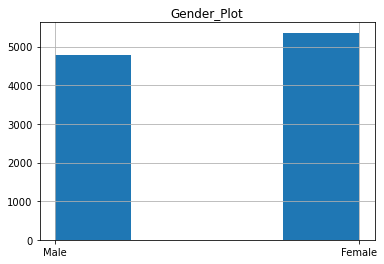

In [12]:
plt.hist(data.Gender,bins=4)
plt.xticks(ticks=[0,1],labels=['Male','Female'])
plt.title('Gender_Plot');plt.grid('True')
plt.show()

In [13]:
data.Gender.replace(['F','M'],[0,1],inplace=True)

In [14]:
#Dependency Count
dependency=data.Dependent_count.astype('int64')
dependency.describe()

count    10127.000000
mean         2.346203
std          1.298908
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: Dependent_count, dtype: float64

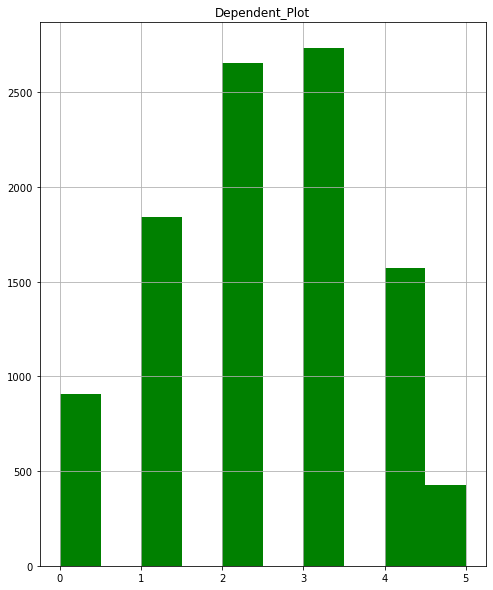

In [15]:
plt.figure(figsize=(8,10))
plt.title('Dependent_Plot')
plt.hist(dependency,color='g')
plt.grid('True')
plt.show()

In [16]:
data.Dependent_count=dependency

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  int64  
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

Most Columns with dtype as object are digits and can be directly transformed to float point numbers 

In [18]:
#Converting Object dtype to Float Numbers
for x in data.columns[-12:]:
    data[x]=data[x].astype('float64')
data.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,1,3,High School,Married,$60K - $80K,Blue,39.0,...,1.0,3.0,12691.0,777.0,11914.0,1.335,1144.0,42.0,1.625,0.061
1,818770008,Existing Customer,49,0,5,Graduate,Single,Less than $40K,Blue,44.0,...,1.0,2.0,8256.0,864.0,7392.0,1.541,1291.0,33.0,3.714,0.105
2,713982108,Existing Customer,51,1,3,Graduate,Married,$80K - $120K,Blue,36.0,...,1.0,0.0,3418.0,0.0,3418.0,2.594,1887.0,20.0,2.333,0.000
3,769911858,Existing Customer,40,0,4,High School,Unknown,Less than $40K,Blue,34.0,...,4.0,1.0,3313.0,2517.0,796.0,1.405,1171.0,20.0,2.333,0.760
4,709106358,Existing Customer,40,1,3,Uneducated,Married,$60K - $80K,Blue,21.0,...,1.0,0.0,4716.0,0.0,4716.0,2.175,816.0,28.0,2.500,0.000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  int64  
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  float64
 10  Total_Relationship_Count  10127 non-null  float64
 11  Months_Inactive_12_mon    10127 non-null  float64
 12  Contacts_Count_12_mon     10127 non-null  float64
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [20]:
#Credit Limit 
data.Credit_Limit.describe()

count    10127.000000
mean      8631.953698
std       9088.776650
min       1438.300000
25%       2555.000000
50%       4549.000000
75%      11067.500000
max      34516.000000
Name: Credit_Limit, dtype: float64

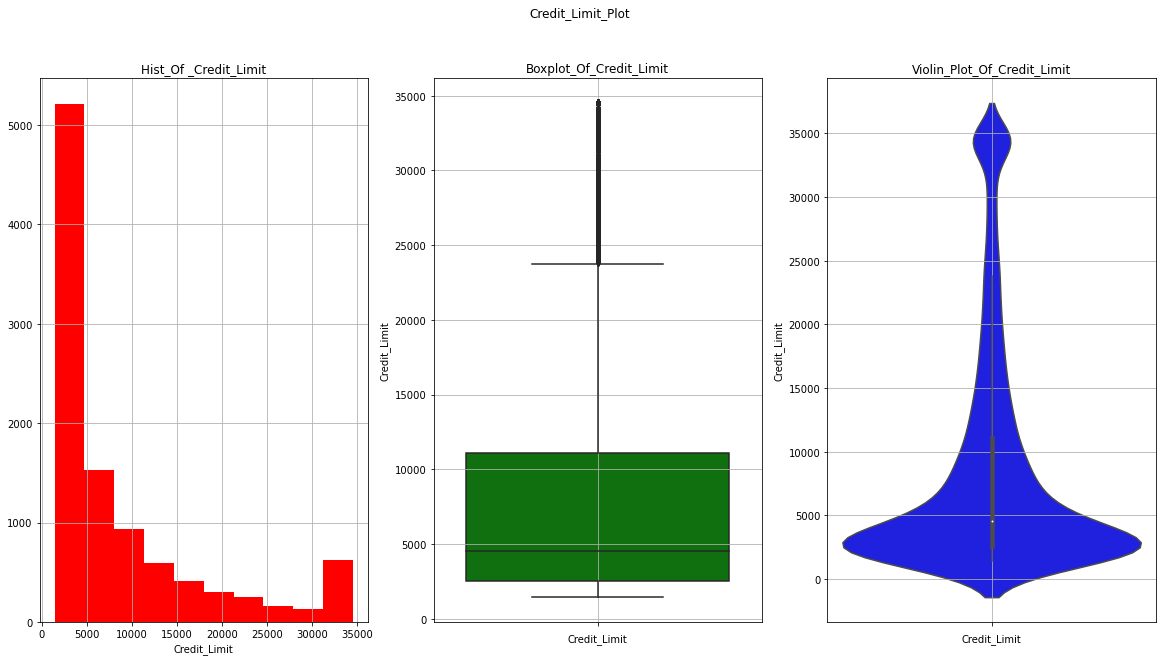

In [21]:
#plot of credit limit
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,10))
fig.suptitle('Credit_Limit_Plot')
ax1.set_title('Hist_Of _Credit_Limit')
ax1.hist(data.Credit_Limit,color='r')
ax1.set_xlabel('Credit_Limit')
ax2.set_title('Boxplot_Of_Credit_Limit')
sns.boxplot(y=data.Credit_Limit,orient='v',color='g',ax=ax2)
ax2.set_xlabel('Credit_Limit')
ax3.set_title('Violin_Plot_Of_Credit_Limit')
sns.violinplot(y=data.Credit_Limit,orient='v',color='b',ax=ax3)
ax3.set_xlabel('Credit_Limit')
ax2.grid('True');ax1.grid('True');ax3.grid('True')
plt.show()

The Histplot above shows That majority of the customers have Credit Limits less than 10000,From the violin plot it can be seen that more customers have limits around 5000. The Boxplot shows the presence of outliers,some customers have credit limits as high as 30000. We have to deal with the outliers since this feature will most likely be an informative one 

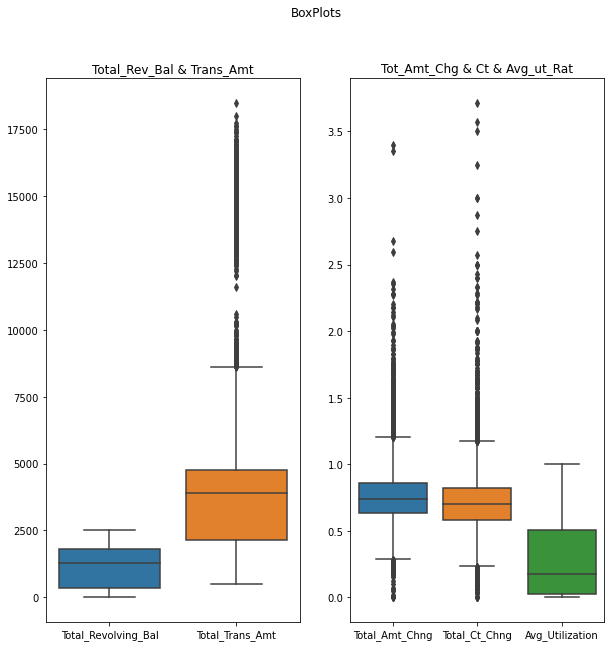

In [22]:
#Box Plots
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,10))
fig.suptitle('BoxPlots')
ax1.set_title('Total_Rev_Bal & Trans_Amt')
sns.boxplot(data=data[['Total_Revolving_Bal','Total_Trans_Amt']],ax=ax1)
ax2.set_title('Tot_Amt_Chg & Ct & Avg_ut_Rat')
sns.boxplot(data=data[['Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']],ax=ax2)
plt.xticks([0,1,2],['Total_Amt_Chng','Total_Ct_Chng','Avg_Utilization'])
plt.show()

The Boxplots of several Features with Continous Values are shown above.
The Boxplot shows the presence of much outliers for some of the features

# Handling Features with non-numeric dtypes

In [23]:
object_data=data.select_dtypes('object')
object_data.head(5)

,Attrition_Flag,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,High School,Married,$60K - $80K,Blue
1,Existing Customer,Graduate,Single,Less than $40K,Blue
2,Existing Customer,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,High School,Unknown,Less than $40K,Blue
4,Existing Customer,Uneducated,Married,$60K - $80K,Blue


In [24]:
#1.Attrition_Flag Mapping
object_data.Attrition_Flag.replace(['Existing Customer','Attrited Customer'],[0,1],inplace=True)
# Card Category Mapping
object_data.Card_Category.replace(['Blue','Silver','Gold','Platinum'],[0,1,2,3],inplace=True)
#Income Category Mapping
object_data.Income_Category.replace([x for x in data.Income_Category.value_counts().index],[0,1,2,3,4,5],inplace=True)
# Education Level Mapping
object_data.Education_Level.replace(['Unknown','Uneducated','High School','College','Graduate','Post-Graduate','Doctorate'],[0,1,2,3,4,5,6],inplace=True)
object_data.head(5)

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Attrition_Flag,Education_Level,Marital_Status,Income_Category,Card_Category
0,0,2,Married,3,0
1,0,4,Single,0,0
2,0,4,Married,2,0
3,0,2,Unknown,0,0
4,0,1,Married,3,0


In [25]:
data.Marital_Status.value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [26]:
#Marital Status Mapping
object_data.Marital_Status.replace(['Unknown','Single','Married','Divorced'],[0,1,2,3],inplace=True)
object_data.head(5)

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Attrition_Flag,Education_Level,Marital_Status,Income_Category,Card_Category
0,0,2,2,3,0
1,0,4,1,0,0
2,0,4,2,2,0
3,0,2,0,0,0
4,0,1,2,3,0


In [27]:
for x in object_data.columns:
    data[x]=object_data[x]
data.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,1,3,2,2,3,0,39.0,...,1.0,3.0,12691.0,777.0,11914.0,1.335,1144.0,42.0,1.625,0.061
1,818770008,0,49,0,5,4,1,0,0,44.0,...,1.0,2.0,8256.0,864.0,7392.0,1.541,1291.0,33.0,3.714,0.105
2,713982108,0,51,1,3,4,2,2,0,36.0,...,1.0,0.0,3418.0,0.0,3418.0,2.594,1887.0,20.0,2.333,0.000
3,769911858,0,40,0,4,2,0,0,0,34.0,...,4.0,1.0,3313.0,2517.0,796.0,1.405,1171.0,20.0,2.333,0.760
4,709106358,0,40,1,3,1,2,3,0,21.0,...,1.0,0.0,4716.0,0.0,4716.0,2.175,816.0,28.0,2.500,0.000


In [28]:
data.drop('CLIENTNUM',axis=1,inplace=True)

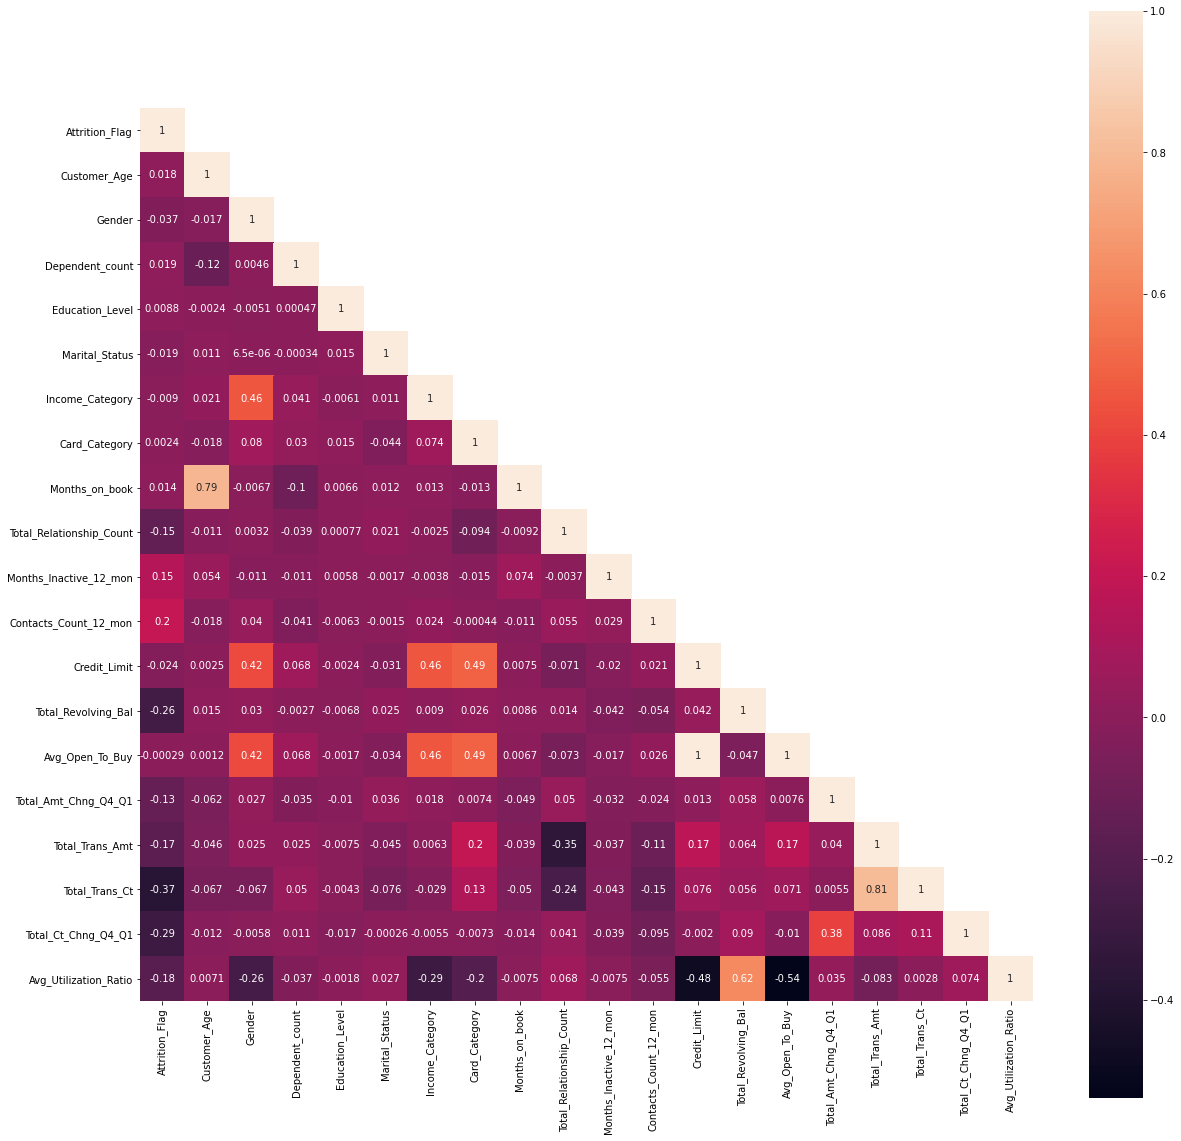

In [29]:
#HeatMap of correlations
fig=plt.figure(figsize=(20,20))
corrmat=data.corr()
mask=np.array(corrmat)
mask[np.tril_indices_from(mask)]=False
sns.heatmap(corrmat,mask=mask,annot=True,vmax=1.0,square=True)
plt.show()

The heatmap of corelations between the features is shown above. 
From the heatmap some features shows very weak correlations with the Target varaible(Attrition_Falg) features such as Education_Level,Credit_Limit,Card_Category,Avg_Open_To_Buy.
The Heatmap also shows perfect corrleations between Credit_Limit and Avg_Open_To_Buy,which suggests that one of the features will not be useful. Features such as Dependent_counts,Marital_Status shows weak correlation with every all other features

In [30]:
data['Avg_per_Total_Rev']=round(data['Avg_Open_To_Buy']/(data['Total_Revolving_Bal']+1),3)
data.head(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Avg_per_Total_Rev
0,0,45,1,3,2,2,3,0,39.0,5.0,...,3.0,12691.0,777.0,11914.0,1.335,1144.0,42.0,1.625,0.061,15.314
1,0,49,0,5,4,1,0,0,44.0,6.0,...,2.0,8256.0,864.0,7392.0,1.541,1291.0,33.0,3.714,0.105,8.546
2,0,51,1,3,4,2,2,0,36.0,4.0,...,0.0,3418.0,0.0,3418.0,2.594,1887.0,20.0,2.333,0.000,3418.000
3,0,40,0,4,2,0,0,0,34.0,3.0,...,1.0,3313.0,2517.0,796.0,1.405,1171.0,20.0,2.333,0.760,0.316
4,0,40,1,3,1,2,3,0,21.0,5.0,...,0.0,4716.0,0.0,4716.0,2.175,816.0,28.0,2.500,0.000,4716.000


In [31]:
data['Avg_per_Total_Trans']=round((data['Avg_Open_To_Buy']+1)/(1+data['Total_Trans_Amt']),3)

In [32]:
data.head(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Avg_per_Total_Rev,Avg_per_Total_Trans
0,0,45,1,3,2,2,3,0,39.0,5.0,...,12691.0,777.0,11914.0,1.335,1144.0,42.0,1.625,0.061,15.314,10.406
1,0,49,0,5,4,1,0,0,44.0,6.0,...,8256.0,864.0,7392.0,1.541,1291.0,33.0,3.714,0.105,8.546,5.722
2,0,51,1,3,4,2,2,0,36.0,4.0,...,3418.0,0.0,3418.0,2.594,1887.0,20.0,2.333,0.000,3418.000,1.811
3,0,40,0,4,2,0,0,0,34.0,3.0,...,3313.0,2517.0,796.0,1.405,1171.0,20.0,2.333,0.760,0.316,0.680
4,0,40,1,3,1,2,3,0,21.0,5.0,...,4716.0,0.0,4716.0,2.175,816.0,28.0,2.500,0.000,4716.000,5.774


In [33]:
#Droping some features
data.drop(['Avg_Open_To_Buy','Marital_Status','Education_Level','Card_Category','Dependent_count'],axis=1,inplace=True)
data.head(5)

,Attrition_Flag,Customer_Age,Gender,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Avg_per_Total_Rev,Avg_per_Total_Trans
0,0,45,1,3,39.0,5.0,1.0,3.0,12691.0,777.0,1.335,1144.0,42.0,1.625,0.061,15.314,10.406
1,0,49,0,0,44.0,6.0,1.0,2.0,8256.0,864.0,1.541,1291.0,33.0,3.714,0.105,8.546,5.722
2,0,51,1,2,36.0,4.0,1.0,0.0,3418.0,0.0,2.594,1887.0,20.0,2.333,0.000,3418.000,1.811
3,0,40,0,0,34.0,3.0,4.0,1.0,3313.0,2517.0,1.405,1171.0,20.0,2.333,0.760,0.316,0.680
4,0,40,1,3,21.0,5.0,1.0,0.0,4716.0,0.0,2.175,816.0,28.0,2.500,0.000,4716.000,5.774


In [34]:
#Taking the Log of some features
col=['Credit_Limit','Customer_Age','Months_on_book','Total_Relationship_Count','Total_Revolving_Bal','Total_Trans_Amt','Total_Trans_Ct','Avg_per_Total_Rev','Avg_per_Total_Trans']
for x in col:
    data[x]=np.log10(data[x]+1)
data.head(5)

,Attrition_Flag,Customer_Age,Gender,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Avg_per_Total_Rev,Avg_per_Total_Trans
0,0,1.662758,1,3,1.602060,0.778151,1.0,3.0,4.103530,2.890980,1.335,3.058805,1.633468,1.625,0.061,1.212560,1.057133
1,0,1.698970,0,0,1.653213,0.845098,1.0,2.0,3.916822,2.937016,1.541,3.111263,1.531479,3.714,0.105,0.979821,0.827499
2,0,1.716003,1,2,1.568202,0.698970,1.0,0.0,3.533899,0.000000,2.594,3.276002,1.322219,2.333,0.000,3.533899,0.448861
3,0,1.612784,0,0,1.544068,0.602060,4.0,1.0,3.520353,3.401056,1.405,3.068928,1.322219,2.333,0.760,0.119256,0.225309
4,0,1.612784,1,3,1.342423,0.778151,1.0,0.0,3.673666,0.000000,2.175,2.912222,1.462398,2.500,0.000,3.673666,0.830845


The features contains values of varying magnitude. Values with higher magnitudes will have higher weights when buildingodels for this reason Features with higher magnitudes were transformed to the log to base 10 of their values to shrink their weights and put them on par with other features to prevent overfitting

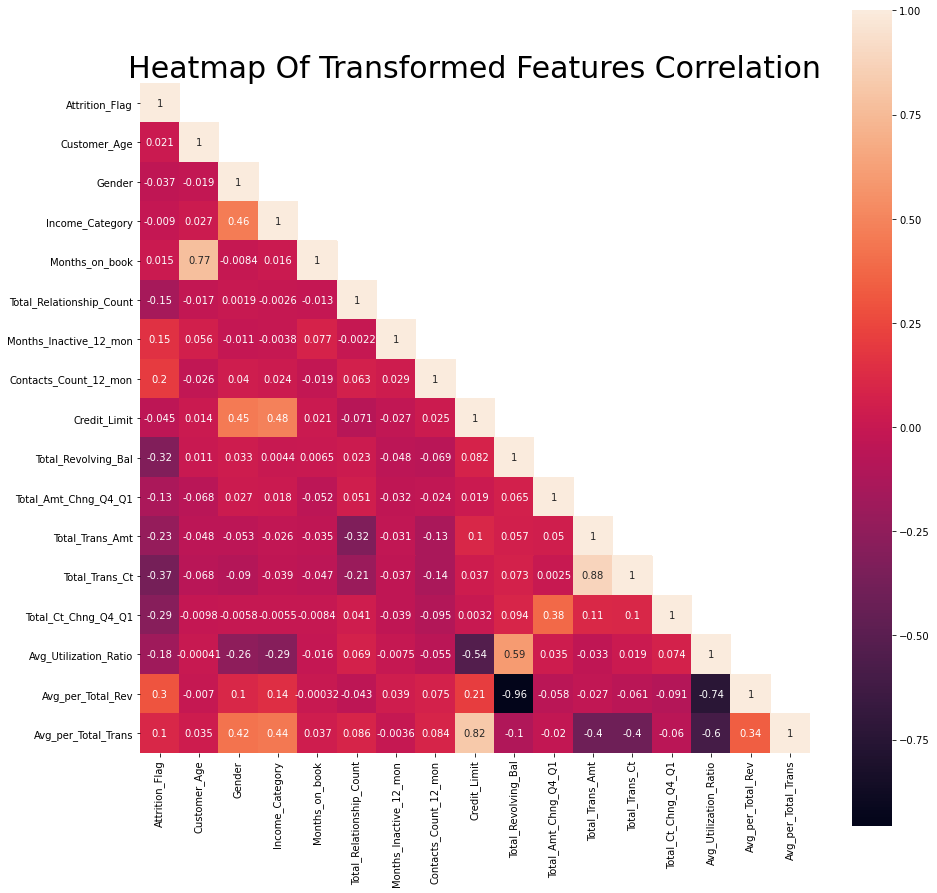

In [35]:
#HeatMap of Transformed features correlations
fig=plt.figure(figsize=(15,15))
corrmat=data.corr()
mask=np.array(corrmat)
mask[np.tril_indices_from(mask)]=False
sns.heatmap(corrmat,mask=mask,annot=True,vmax=1.0,square=True)
plt.title('Heatmap Of Transformed Features Correlation',size=30)
plt.show()

Heatmap of Transformed and Extracted Features is shown above

In [36]:
#Split the Data Into test and train using StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit as sss
split=sss(n_splits=1,test_size=0.20,random_state=42)
for x,y in split.split(data,data['Attrition_Flag']):
    train=data.loc[x];test=data.loc[y]
print('Train',train.shape,'\n','Test',test.shape)

Train (8101, 17) 
 Test (2026, 17)


In [37]:
#Extracting Target Features of Train and Test
y_train=train.Attrition_Flag.values
y_test=test.Attrition_Flag.values
train.drop('Attrition_Flag',axis=1,inplace=True)
test.drop('Attrition_Flag',axis=1,inplace=True)
y_train.shape

(8101,)

In [38]:
train.head(5)

,Customer_Age,Gender,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Avg_per_Total_Rev,Avg_per_Total_Trans
2856,1.568202,0,0,1.397940,0.698970,3.0,2.0,3.410102,3.348500,0.686,3.244525,1.633468,0.448,0.868,0.061452,0.077004
6515,1.653213,1,3,1.568202,0.778151,2.0,3.0,4.402726,0.000000,0.849,3.358506,1.591065,0.583,0.000,4.402726,1.081779
7141,1.672098,1,2,1.491362,0.845098,3.0,1.0,4.067108,2.961895,0.892,3.631241,1.954243,0.854,0.078,1.105204,0.545802
632,1.568202,0,0,1.397940,0.602060,1.0,3.0,3.494850,3.202488,0.869,3.218273,1.623249,0.367,0.510,0.292256,0.284882
3496,1.707570,1,5,1.612784,0.698970,2.0,3.0,4.538033,3.074085,0.725,3.588272,1.863323,0.714,0.034,1.463953,0.982362


In [39]:
# STANDARD SCALING
scaler=sklearn.preprocessing.StandardScaler()
scaler.fit(train)
train=scaler.transform(train)
test=scaler.transform(test)
train[:3]

array([[-1.33001081, -0.94673201, -1.03038823, -1.55864359,  0.27207445,
         0.64649465, -0.41123563, -0.80525121,  0.70411582, -0.33559655,
        -1.05034456, -0.85837654, -1.09357251,  2.14886698, -0.92692829,
        -0.96467107],
       [-0.21095426,  1.05626512,  0.78949005,  0.10836782,  0.76567951,
        -0.34241267,  0.48963506,  1.65374404, -1.75364177,  0.40748907,
        -0.65040725, -1.09839708, -0.53724387, -1.00007234,  2.2058302 ,
         2.09557918],
       [ 0.03764675,  1.05626512,  0.18286396, -0.64396342,  1.18301665,
         0.64649465, -1.31210631,  0.82232933,  0.42035316,  0.60351779,
         0.30656338,  0.95731626,  0.57953438, -0.71710314, -0.1737345 ,
         0.46314869]])

# MODEL BUILDING 

Some important Functions will be written and  to avoid repeating codes


In [40]:
#Function to return Prediction,Decision_Function,confusion_matrix and classifcation report
def f(classifier,x,y,Method):
    pre=cross_val_predict(classifier,x,y,cv=5)
    pre_thresh=cross_val_predict(classifier,x,y,cv=5,method=Method)
    con_mat=confusion_matrix(y,pre)
    precision=precision_score(y,pre)
    recall=recall_score(y,pre)
    print('confusion_matrix:','\n',con_mat,'\n','\n','precision_score:',round(precision,3),'\n','\n','recall_score:',round(recall,3))
    return pre,pre_thresh

In [41]:
#Function To Display Precision_Recall_Curve
def curve(thresh,title):
    precision,recall,threshold=precision_recall_curve(y_train,thresh)
    plt.figure(figsize=(8,10))
    plt.plot(threshold,precision[:-1],c='r',label='Precision',lw=2)
    plt.plot(threshold,recall[:-1],c='g',label='Recall',lw=2)
    plt.legend(loc='best')
    plt.xlabel('Threshold')
    plt.ylabel('Precision_Recall')
    plt.title(title)
    plt.grid('True')
    plt.show()

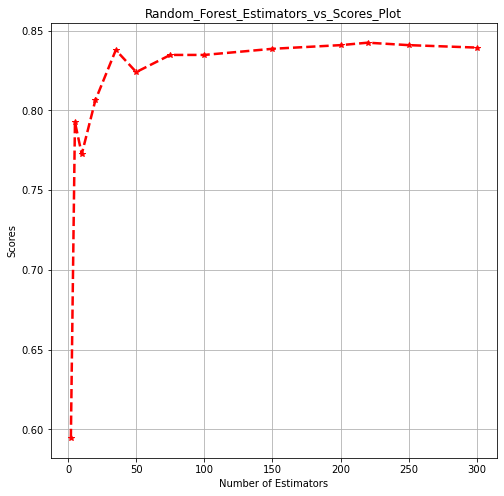

In [42]:
#Selecting Best Number Of Estimators
estimators=[2,5,10,20,35,50,75,100,150,200,220,250,300];scores=[];
for x in estimators:
    forest_clf=RandomForestClassifier(n_estimators=x,random_state=42)
    forest_pre=cross_val_predict(forest_clf,train,y_train,cv=5)
    scores.append(recall_score(y_train,forest_pre))
# Plot of Scores vs Estimators
plt.figure(figsize=(8,8))
plt.plot(estimators,scores,'r*--',lw=2.5)
plt.xlabel('Number of Estimators')
plt.ylabel('Scores')
plt.title('Random_Forest_Estimators_vs_Scores_Plot')
plt.grid('True')
plt.show()
          

In [43]:
forest_clf=RandomForestClassifier(random_state=42,n_estimators=220)
forest_clf.fit(train,y_train)

RandomForestClassifier(n_estimators=220, random_state=42)

In [44]:
forest_pre,forest_proba=f(forest_clf,train,y_train,'predict_proba')

confusion_matrix: 
 [[6722   77]
 [ 205 1097]] 
 
 precision_score: 0.934 
 
 recall_score: 0.843


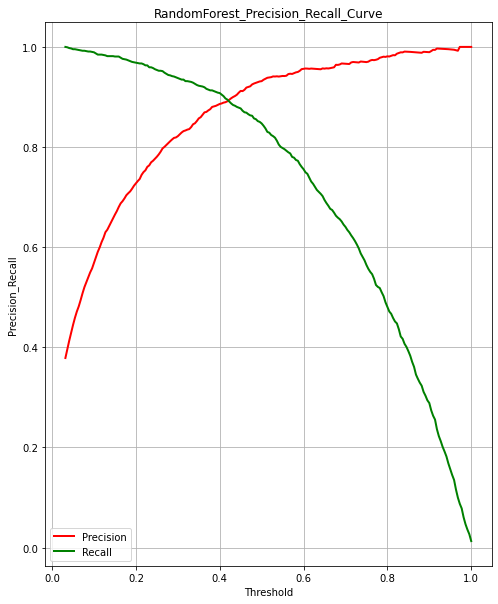

In [45]:
curve(forest_proba[:,-1],'RandomForest_Precision_Recall_Curve')

In [46]:
# Predicting Test data
forest_test=forest_clf.predict(test)

In [47]:
#Test Data Recall Score
recall_score(y_test,forest_test)

0.8153846153846154

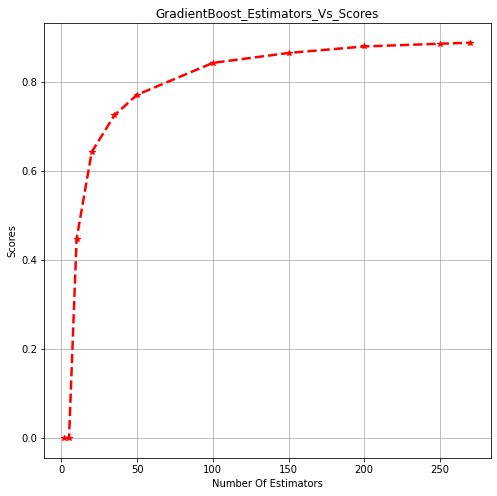

In [48]:
#Finding Best Estimators for GradientBoostingClassifier
estimators=[2,5,10,20,35,50,100,150,200,250,270];scores=[]
for x in estimators:
    grad_clf=GradientBoostingClassifier(n_estimators=x,random_state=42)
    grad_pre=cross_val_predict(grad_clf,train,y_train,cv=5)
    scores.append(recall_score(y_train,grad_pre))
plt.figure(figsize=(8,8))
plt.title('GradientBoost_Estimators_Vs_Scores')
plt.xlabel('Number Of Estimators')
plt.ylabel('Scores')
plt.plot(estimators,scores,'r*--',lw=2.5)
plt.grid('True')
plt.show()

In [49]:
grad_clf=GradientBoostingClassifier(random_state=42,n_estimators=250)
grad_clf.fit(train,y_train)

GradientBoostingClassifier(n_estimators=250, random_state=42)

In [50]:
grad_pre,grad_proba=f(grad_clf,train,y_train,'predict_proba')

confusion_matrix: 
 [[6729   70]
 [ 150 1152]] 
 
 precision_score: 0.943 
 
 recall_score: 0.885


Fig 1.5


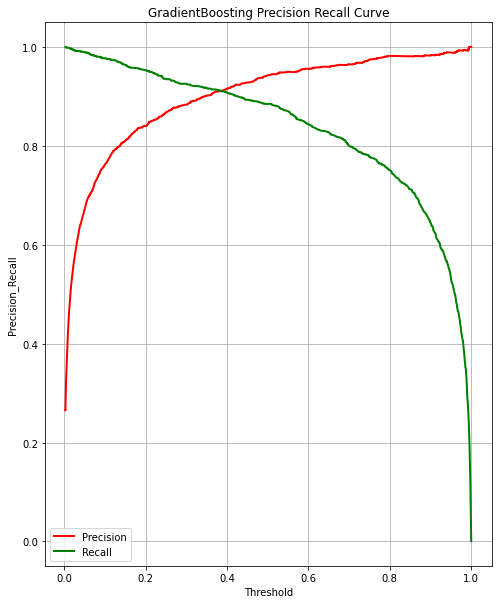

In [51]:
print('Fig 1.5')
curve(grad_proba[:,-1],'GradientBoosting Precision Recall Curve')

In [52]:
# Predicting Test Data
grad_test=grad_clf.predict(test)

In [53]:
#Test Recall Score
recall_score(y_test,grad_test)

0.8492307692307692

Gradient Boosting Classifier Gives a Recall score of 0.885 and a Precision Score of 0.943 on Train Data using Cross Validation and a Recall of 0.852 on Test data

In [54]:
for x,y in zip(data.columns,grad_clf.feature_importances_):
    print(x,'\t',round(y,5))

Attrition_Flag 	 0.01442
Customer_Age 	 0.00091
Gender 	 0.0006
Income_Category 	 0.00267
Months_on_book 	 0.09251
Total_Relationship_Count 	 0.0164
Months_Inactive_12_mon 	 0.01715
Contacts_Count_12_mon 	 0.00216
Credit_Limit 	 0.18408
Total_Revolving_Bal 	 0.03435
Total_Amt_Chng_Q4_Q1 	 0.19667
Total_Trans_Amt 	 0.32995
Total_Trans_Ct 	 0.09843
Total_Ct_Chng_Q4_Q1 	 0.0011
Avg_Utilization_Ratio 	 0.00472
Avg_per_Total_Rev 	 0.0039


The Results above shows that features such as Total_Trans_Amt and Total_Chng_Q4_Q1 are the most informative and contributes significantly to the GradientBoosting Model while features such as Gender,Customer Age and Total_Ct_Chng_Q4_Q1 can be considered inconsequential and contributes less to the model and can be dropped.

PRECISION-RECALL CALLOFF : Precision and Recall scores vary with each other and with the value of threshold used for decision Making,as Precision increases Recall scores tends to decrease. If the threshold for decision making is decreased higher recall score is acheived while precision score reduces, if we increase the threshold of decision making a higher precision score is acheived with a reduced recall score this can be demonstrated from the Fig 1.5 (Gradient Boosting Precision_Recall_Curve),The threshold is at 0.6 which gives a precision of 0.943 and recall of 0.882. If the threshold is reduced to 0.2 we will acheive a recall of 0.9+ while precision will be 0.83. To achieve a recall of 1.0 the threshold 0.0 while precision will be between 0.35 and 0.40. The Business Objective is to predict as much Customers who are more likely to churn or be attrited this will be achieved by setting the threshold to get a high recall while keeping the precision at a reasonable point
  

In [55]:
#Set The Threshold for Decision Making at 0.2 For GradientBoosting
threshold=0.2
grad_tradeoff_dec=grad_proba[:,-1]
grad_tradeoff_pre=np.where(grad_tradeoff_dec>=0.2,1,0)
print('confusion_matrix:','\n',confusion_matrix(y_train,grad_tradeoff_pre),'\n','\n','Precision_Score:',round(precision_score(y_train,grad_tradeoff_pre),3),'\n','\n','Recall_Score:',round(recall_score(y_train,grad_tradeoff_pre),3))

confusion_matrix: 
 [[6563  236]
 [  61 1241]] 
 
 Precision_Score: 0.84 
 
 Recall_Score: 0.953


In [56]:
#PREDICTING TEST DATA
grad_tradeoff_test_proba=grad_clf.predict_proba(test)[:,-1]
grad_tradeoff_test_pre=np.where(grad_tradeoff_test_proba>=0.2,1,0)
print('Test_Precision_Score:',round(precision_score(y_test,grad_tradeoff_test_pre),3),'\n','\n','Test Recall Score:',round(recall_score(y_test,grad_tradeoff_test_pre),3))

Test_Precision_Score: 0.863 
 
 Test Recall Score: 0.932


The result above shows that a threshold of 0.2 yields a recall score of 0.932 and precision score of 0.863


There are no hard rules for altering thresholds to make decisions, there are numerous ways to achieve this. We can acheive any value for recall and precision by continously varying the threshold.